## UCLA model trained on the combined ITU + UCLA dataset without visual attributes evaluation

In [1]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/lucas/Documents/ITU/Thesis_2018/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [2]:
pred_dir = "models_preds"
file_name = "UCLA_model_without_visual_in_combined_dataset_datalen-44446_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"

preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  8888  rows


In [3]:
preds

,imageHASH,name,violence,protest,luca rossi,pred_protest,pred_violence
0,54dbf81c39596068,train-18661.jpg,0.362514,True,False,0.994199,0.347720
1,b36dd1b331bb2baa,train-30229.jpg,0.261021,True,False,0.998619,0.320838
2,64c444099a5475c5,train-13975.jpg,0.427324,True,False,0.781003,0.429071
3,2e1ce862ceca8aaa,train-11855.jpg,0.317966,True,False,0.999882,0.334390
4,7332acacbea4e62a,train-24927.jpg,-1.000000,False,False,0.277680,0.420489
5,9b9d0d0a0ad9696d,train-07854.jpg,0.419953,True,False,0.999043,0.348276
6,63cf33534b086c20,train-12823.jpg,-1.000000,False,False,0.002714,0.174776
7,f864f0f66e623636,test-05258.jpg,0.512423,True,False,0.732045,0.607063
8,92b048c6a4c8aaac,train-24408.jpg,-1.000000,False,False,0.003034,0.336881
9,f1f3a3aaa2021230,train-28415.jpg,-1.000000,False,False,0.365123,0.393543


### Protest

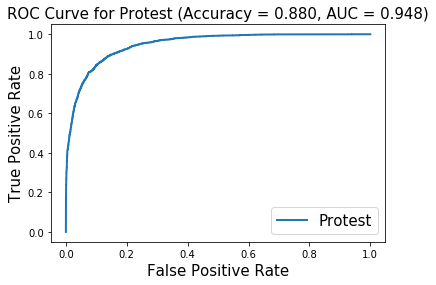

In [4]:
au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.864, R_squared = 0.747 )')

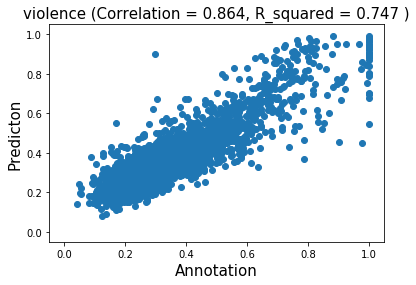

In [5]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["pred_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
